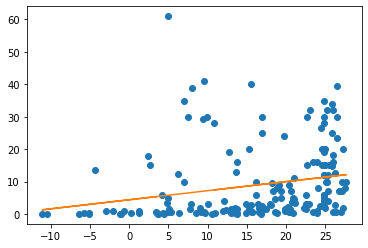

     height  temp
0    28.000  10.8
1    26.600  24.5
2     0.300  20.9
3     1.600  19.9
4     0.200   9.7
..      ...   ...
173   0.550  26.0
174   6.000  24.9
175   0.500  16.7
176  15.000   2.7
177   0.246   3.5

[178 rows x 2 columns]
x_mean: 16.125280898876408
y_mean: 8.908989287595507
slope: 0.279836372542003
y-intercept: 4.396549174633083
SE_line: -2.842170943040401e-14
SE_y: -1.1368683772161603e-13
R_squared: 0.75


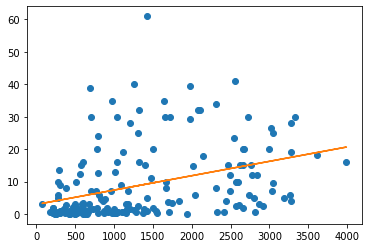

     height  rain
0    28.000  1208
1    26.600  3015
2     0.300   278
3     1.600   598
4     0.200   976
..      ...   ...
173   0.550  1117
174   6.000  2731
175   0.500   630
176  15.000   572
177   0.246  1555

[178 rows x 2 columns]
x_mean: 1344.1404494382023
y_mean: 8.908989287595507
slope: 0.004435779728580937
y-intercept: 2.946678329611859
SE_line: -1.1368683772161603e-13
SE_y: -1.1368683772161603e-13
R_squared: 0.0


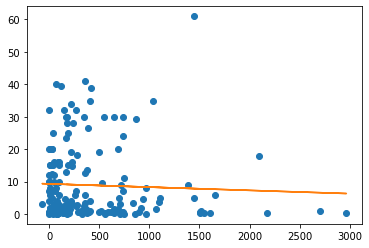

     height   alt
0    28.000   179
1    26.600   386
2     0.300   553
3     1.600   115
4     0.200   200
..      ...   ...
173   0.550    85
174   6.000     8
175   0.500   614
176  15.000    21
177   0.246  1608

[178 rows x 2 columns]
x_mean: 393.58988764044943
y_mean: 8.908989287595507
slope: -0.0010052461241302837
y-intercept: 9.304643996642943
SE_line: -3.126388037344441e-13
SE_y: -1.1368683772161603e-13
R_squared: -1.75


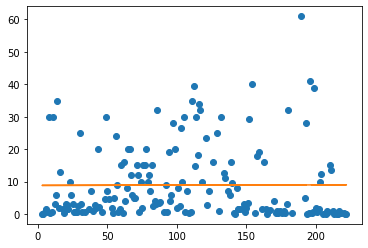

     site  height
0     193  28.000
1     103  26.600
2      54   0.300
3     144   1.600
4     178   0.200
..    ...     ...
173    91   0.550
174    68   6.000
175    32   0.500
176   210  15.000
177   197   0.246

[178 rows x 2 columns]
x_mean: 107.91011235955057
y_mean: 8.908989287595507
slope: 0.0007814504687545153
y-intercept: 8.824662879708784
SE_line: -2.984279490192421e-13
SE_y: -1.1368683772161603e-13
R_squared: -1.625
Max R_squared: 0.75
Reason: Temperature had the greatest correlation with the trend for why the plants grew. Cold climates cause things not to grow.


In [1]:
#
# Lucius Latham
# Faith Meyer
#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# Run a linear regression on column names x and y.
# Returns the R^2 
def linearRegression(x_col, y_col):
    # Read the CSV into a dataframe for computation
    df = pd.read_csv("Plant Height Data - Data.csv", usecols=[x_col, y_col])
    
    # Compute the means
    x_mean = df[x_col].mean()
    y_mean = df[y_col].mean()
    
    # Compute the slope fraction parts and then the total
    numerator = df.apply(lambda row: (row[x_col] - x_mean) * (row[y_col] - y_mean), axis=1).sum()
    denominator = df.apply(lambda row: (row[x_col] - x_mean) ** 2, axis=1).sum()
    m = numerator / denominator
    
    # Compute the y-intercept
    b = y_mean - m * x_mean
    
    # Convert to numpy for plotting
    x = df[x_col].to_numpy()
    y = df[y_col].to_numpy()
    y_line = m*x + b
    
    # Compute the standard error and R^2
    SE_line = df.apply(lambda row: (row[y_col] - y_line[row.name]), axis=1).sum()
    SE_y = df[y_col].apply(lambda y: y - y_mean).sum()
    R_squared = 1 - SE_line / SE_y
    
    # Plot the points and line
    plt.plot(x, y, 'o')
    plt.plot(x, y_line)
    plt.show()
    
    # Print out debugging information
    print(df)
    print("x_mean: " + str(x_mean))
    print("y_mean: " + str(y_mean))
    print("slope: " + str(m))
    print("y-intercept: " + str(b))
    print("SE_line: " + str(SE_line))
    print("SE_y: " + str(SE_y))
    print("R_squared: " + str(R_squared))
    
    return R_squared

# Find the maximum R^2 of the linear regressions.
linearRegressions = np.array([
    linearRegression('temp', 'height'),
    linearRegression('rain', 'height'),
    linearRegression('alt', 'height'),
    linearRegression('site', 'height')])

# Print the maximum and the suggested reasoning
print("Max R_squared: " + str(linearRegressions.max()))
print("Reason: Temperature had the greatest correlation with the trend for why the plants grew. Cold climates cause things not to grow.")